In [44]:
pip install -r requirements.txt

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

## Importación de librerías

In [45]:
 #Tratamiento de datos
# =====================
#import arff
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ===============================================================
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Se carga el data set

In [46]:
# Cargando el dataset desde un archivo Excel
file_path = 'Intención_Emprendedora_Ibagué_Laura.xlsx'
data = pd.read_excel(file_path)

data.head()

,Fecha,Consentimiento datos,Semestre,Edad,Género,Estado Civil,Escolaridad Madre,Escolaridad Padre,Trabajo Madre,Trabajo Padre,...,Sueño Empresarial,Logro de Negocio,Intención de Emprender,Oportunidades Universitarias,Liderazgo Universitario,Herramientas de Planificación,Creatividad e Innovación,Análisis y Riesgo,Contactos Universitarios,Motivación al Emprendimiento
0,2021-04-12 10:52:37.403,Si,X,44,Masculino,Casado,Secundaria,Secundaria,Retirado / Pensionado,Retirado / Pensionado,...,De acuerdo,No lo sé,De acuerdo,No lo sé,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo
1,2021-04-13 16:45:36.891,Si,V,20,Femenino,Soltero,Superior / Profesional,Secundaria,Trabaja en una compañía,Emprendedor,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo
2,2021-04-13 18:44:19.589,Si,X,27,Masculino,Soltero,Superior / Profesional,Superior / Profesional,Trabaja en una compañía,Emprendedor,...,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo
3,2021-04-13 18:52:13.541,Si,III,20,Femenino,Soltero,Superior / Profesional,Secundaria,Trabaja en una compañía,Emprendedor,...,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo
4,2021-04-13 19:07:40.046,Si,IX,20,Femenino,Soltero,Secundaria,Superior / Profesional,No trabaja,Retirado / Pensionado,...,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,En total desacuerdo


In [47]:
# Descripción general de los datos para entender los tipos de datos y valores faltantes
print(data.describe(include='all'))


                                Fecha Consentimiento  datos Semestre  \
count                             305                   305      305   
unique                            NaN                     2       10   
top                               NaN                    Si        I   
freq                              NaN                   297       87   
mean    2021-04-15 13:54:39.735206656                   NaN      NaN   
min        2021-04-12 10:52:37.403000                   NaN      NaN   
25%        2021-04-14 17:29:06.760000                   NaN      NaN   
50%     2021-04-15 14:04:59.255000064                   NaN      NaN   
75%     2021-04-15 21:53:08.240999936                   NaN      NaN   
max        2021-05-05 12:23:34.125000                   NaN      NaN   
std                               NaN                   NaN      NaN   

              Edad     Género Estado Civil Escolaridad Madre  \
count   305.000000        305          305               305   
unique 

## Listamos cada uno de los tipos de datos para cada columna

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Fecha                          305 non-null    datetime64[ns]
 1   Consentimiento  datos          305 non-null    object        
 2   Semestre                       305 non-null    object        
 3   Edad                           305 non-null    int64         
 4   Género                         305 non-null    object        
 5   Estado Civil                   305 non-null    object        
 6   Escolaridad Madre              305 non-null    object        
 7   Escolaridad Padre              305 non-null    object        
 8   Trabajo Madre                  305 non-null    object        
 9   Trabajo Padre                  305 non-null    object        
 10  Hermanos                       305 non-null    object        
 11  Detección Oportunid

In [49]:
data.shape

(305, 47)

### Mezclar el data set

In [50]:
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,Fecha,Consentimiento datos,Semestre,Edad,Género,Estado Civil,Escolaridad Madre,Escolaridad Padre,Trabajo Madre,Trabajo Padre,...,Sueño Empresarial,Logro de Negocio,Intención de Emprender,Oportunidades Universitarias,Liderazgo Universitario,Herramientas de Planificación,Creatividad e Innovación,Análisis y Riesgo,Contactos Universitarios,Motivación al Emprendimiento
0,2021-04-15 15:28:04.394,Si,V,21,Masculino,Soltero,Secundaria,Secundaria,No trabaja,Emprendedor,...,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo
1,2021-04-16 14:32:26.154,Si,I,18,Femenino,Soltero,Superior / Profesional,Otra,No lo se,No lo se,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,No lo sé,No lo sé,No lo sé,De acuerdo,De acuerdo,No lo sé,En desacuerdo
2,2021-04-15 20:44:02.597,Si,III,20,Femenino,Soltero,Secundaria,Secundaria,No trabaja,Trabaja en una compañía,...,De acuerdo,De acuerdo,De acuerdo,De acuerdo,En desacuerdo,De acuerdo,No lo sé,De acuerdo,Totalmente de acuerdo,De acuerdo
3,2021-04-16 09:35:44.325,Si,VII,20,Femenino,Soltero,Especialista,Secundaria,Trabaja en una compañía,Emprendedor,...,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo
4,2021-04-15 13:14:06.293,Si,I,17,Masculino,Soltero,Especialista,Superior / Profesional,Trabaja en una compañía,Trabaja en una compañía,...,De acuerdo,De acuerdo,De acuerdo,No lo sé,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo
5,2021-04-16 21:46:59.484,Si,II,19,Masculino,Soltero,Superior / Profesional,Secundaria,Trabaja en una compañía,Trabaja en una compañía,...,De acuerdo,Totalmente de acuerdo,De acuerdo,Totalmente de acuerdo,De acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo
6,2021-04-16 07:35:24.276,Si,III,19,Femenino,Soltero,Maestría,Especialización,Trabaja en una compañía,Trabaja en una compañía,...,No lo sé,No lo sé,No lo sé,No lo sé,De acuerdo,De acuerdo,No lo sé,De acuerdo,No lo sé,No lo sé
7,2021-04-15 00:53:17.206,Si,VII,22,Masculino,Soltero,Secundaria,Superior / Profesional,Retirado / Pensionado,Trabaja en una compañía,...,De acuerdo,De acuerdo,De acuerdo,No lo sé,No lo sé,No lo sé,No lo sé,No lo sé,No lo sé,No lo sé
8,2021-04-16 19:10:34.381,Si,VIII,24,Masculino,Soltero,Doctorado,Secundaria,Trabaja en una compañía,Emprendedor,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo,De acuerdo,Totalmente de acuerdo
9,2021-04-15 17:02:06.857,Si,VIII,22,Femenino,Soltero,Superior / Profesional,Superior / Profesional,Trabaja en una compañía,Trabaja en una compañía,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,No lo sé,No lo sé,No lo sé,No lo sé,No lo sé,No lo sé,Totalmente de acuerdo


### Identificación de datos faltantes

In [51]:
data.isna().sum().sort_values()

Fecha                            0
Mejora Convencional              0
Creatividad Proyectos            0
Asumir Deuda                     0
Riesgos por Beneficios           0
Decisiones y Confort             0
Riesgos Impactantes              0
Importancia Contactos            0
Conexiones Profesionales         0
Relacionarse Fácilmente          0
Cambio de Trabajo                0
Contacto Constante               0
Compromiso Empresarial           0
Sueño Empresarial                0
Logro de Negocio                 0
Intención de Emprender           0
Oportunidades Universitarias     0
Liderazgo Universitario          0
Herramientas de Planificación    0
Creatividad e Innovación         0
Análisis y Riesgo                0
Actitud Emprendedora             0
Contactos Universitarios         0
Trabajo Novedoso                 0
Establecimiento Metas            0
Consentimiento  datos            0
Semestre                         0
Edad                             0
Género              

#### Valores faltantes visualmente

<Axes: >

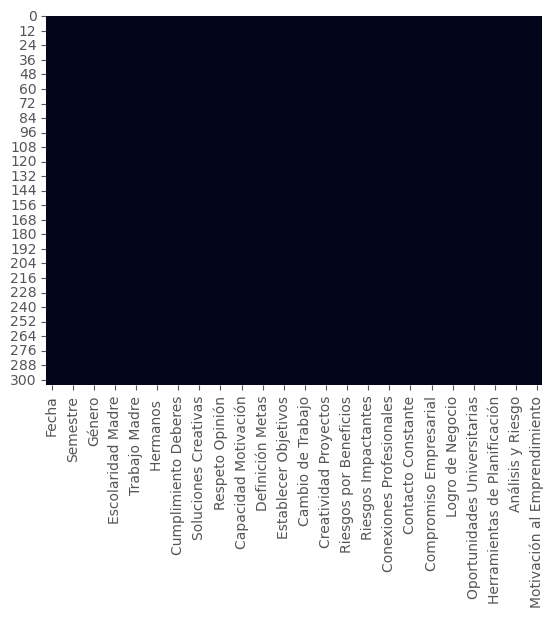

In [52]:
sns.heatmap(data.isnull(), cbar=False)

#### Se visualiza la distribución de la variables cuantitativas en un histograma

array([[<Axes: title={'center': 'Fecha'}>,
        <Axes: title={'center': 'Edad'}>]], dtype=object)

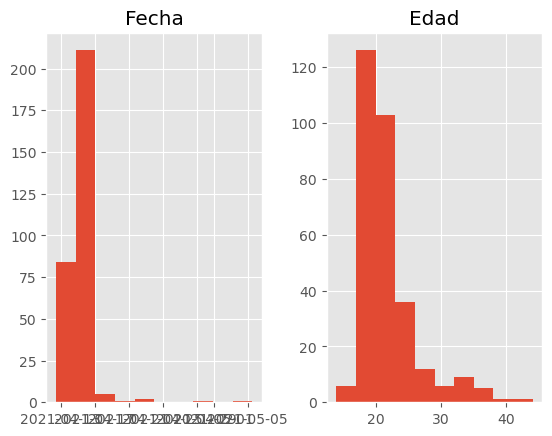

In [53]:
data.hist()

###### Visualizar la relación entre todas las variables utilizando una matriz de diagramas de dispersión

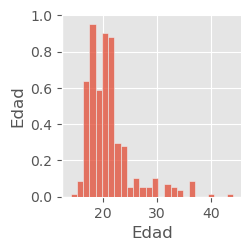

In [54]:
sns.pairplot(data)

In [55]:
data['Detección Oportunidades'].unique()

array(['De acuerdo', 'Totalmente de acuerdo', 'No lo sé', 'En desacuerdo',
       'En total desacuerdo'], dtype=object)

In [56]:
data['Edad'].unique()

array([21, 18, 20, 17, 19, 22, 24, 36, 34, 33, 23, 32, 28, 29, 27, 16, 25,
       26, 30, 37, 40, 14, 44], dtype=int64)

In [57]:
print(data.isnull().values.any())

False


In [58]:
data['Detección Oportunidades'].value_counts()

Detección Oportunidades
De acuerdo               137
Totalmente de acuerdo     70
No lo sé                  59
En desacuerdo             23
En total desacuerdo       16
Name: count, dtype: int64

## Análisis estadistico descriptivo

In [59]:
data.nunique()

Fecha                            305
Consentimiento  datos              2
Semestre                          10
Edad                              23
Género                             2
Estado Civil                       4
Escolaridad Madre                  7
Escolaridad Padre                  7
Trabajo Madre                      5
Trabajo Padre                      5
Hermanos                           7
Detección Oportunidades            5
Cumplimiento Deberes               5
Persistencia                       5
Soluciones Creativas               5
Elección Líder                     5
Respeto Opinión                    5
Resolución Conflictos              5
Capacidad Motivación               5
Planificación                      5
Definición Metas                   5
Establecimiento Metas              5
Establecer Objetivos               5
Trabajo Novedoso                   5
Cambio de Trabajo                  5
Mejora Convencional                5
Creatividad Proyectos              5
A

In [60]:
data.describe()

,Fecha,Edad
count,305,305.000000
mean,2021-04-15 13:54:39.735206656,20.977049
min,2021-04-12 10:52:37.403000,14.000000
25%,2021-04-14 17:29:06.760000,18.000000
50%,2021-04-15 14:04:59.255000064,20.000000
75%,2021-04-15 21:53:08.240999936,22.000000
max,2021-05-05 12:23:34.125000,44.000000
std,NaN,4.405006


In [61]:
data.columns

Index(['Fecha', 'Consentimiento  datos', 'Semestre', 'Edad', 'Género',
       'Estado Civil', 'Escolaridad Madre', 'Escolaridad Padre',
       'Trabajo Madre', 'Trabajo Padre', 'Hermanos ',
       'Detección Oportunidades', 'Cumplimiento Deberes', 'Persistencia',
       'Soluciones Creativas', 'Elección Líder', 'Respeto Opinión',
       'Resolución Conflictos', 'Capacidad Motivación', 'Planificación',
       'Definición Metas', 'Establecimiento Metas', 'Establecer Objetivos',
       'Trabajo Novedoso ', 'Cambio de Trabajo', 'Mejora Convencional',
       'Creatividad Proyectos', 'Asumir Deuda', 'Riesgos por Beneficios',
       'Decisiones y Confort', 'Riesgos Impactantes', 'Importancia Contactos',
       'Conexiones Profesionales', 'Relacionarse Fácilmente',
       'Contacto Constante', 'Actitud Emprendedora', 'Compromiso Empresarial',
       'Sueño Empresarial', 'Logro de Negocio', 'Intención de Emprender',
       'Oportunidades Universitarias', 'Liderazgo Universitario',
       'Herra

In [62]:
#Cuenta los valores
data['Edad'].value_counts()

Edad
18    55
20    52
17    37
19    34
21    32
22    19
23    17
24    16
26     6
16     5
32     4
33     3
28     3
29     3
27     3
25     3
36     3
30     3
34     2
37     2
40     1
14     1
44     1
Name: count, dtype: int64

## Relación entre:

<Axes: xlabel='Cumplimiento Deberes', ylabel='Edad'>

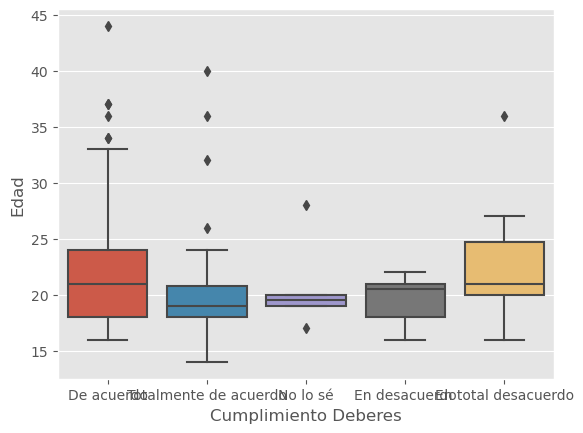

In [63]:

sns.boxplot(x="Cumplimiento Deberes", y="Edad", data=data)

## División del conjunto de datos

In [64]:
#Funciones para división del cinjunto de datos en tres partes
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [65]:
train_set, val_set, test_set = train_val_test_split(data, stratify='Detección Oportunidades')

In [66]:
print('longitud del training set', len(train_set))
print('longitud del Vañidation set', len(val_set))
print('longitud del Test set', len(test_set))

longitud del training set 183
longitud del Vañidation set 61
longitud del Test set 61


###### Nuestra variable hipótesis es "Intención de Emprender", porque refleja el nivel de intención o deseo de los estudiantes de iniciar un negocio o de emprender

In [67]:
x_train = train_set.drop('Intención de Emprender', axis=1)
x_train

,Fecha,Consentimiento datos,Semestre,Edad,Género,Estado Civil,Escolaridad Madre,Escolaridad Padre,Trabajo Madre,Trabajo Padre,...,Compromiso Empresarial,Sueño Empresarial,Logro de Negocio,Oportunidades Universitarias,Liderazgo Universitario,Herramientas de Planificación,Creatividad e Innovación,Análisis y Riesgo,Contactos Universitarios,Motivación al Emprendimiento
193,2021-04-16 13:06:32.684,Si,VIII,20,Femenino,Soltero,Superior / Profesional,Secundaria,Trabaja en una compañía,No trabaja,...,De acuerdo,No lo sé,En desacuerdo,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,De acuerdo,En desacuerdo
207,2021-04-15 17:46:30.360,Si,VIII,26,Femenino,Soltero,Primaria,Primaria,Trabaja en una compañía,Emprendedor,...,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,No lo sé,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo
196,2021-04-14 20:21:36.946,Si,III,18,Masculino,Soltero,Superior / Profesional,Secundaria,No trabaja,Emprendedor,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo,No lo sé,De acuerdo,Totalmente de acuerdo
11,2021-04-15 20:18:36.624,Si,III,36,Masculino,Casado,Primaria,Secundaria,No trabaja,Trabaja en una compañía,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo
99,2021-04-16 07:39:52.058,Si,III,17,Masculino,Soltero,Secundaria,Secundaria,Emprendedora,Trabaja en una compañía,...,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,No lo sé,De acuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,2021-04-14 14:00:59.338,No,I,17,Masculino,Soltero,Secundaria,Otra,Trabaja en una compañía,Trabaja en una compañía,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,No lo sé,De acuerdo,De acuerdo,No lo sé,De acuerdo,Totalmente de acuerdo
227,2021-04-15 20:41:42.937,Si,I,22,Femenino,Soltero,Superior / Profesional,Superior / Profesional,Trabaja en una compañía,Emprendedor,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,No lo sé,No lo sé,Totalmente de acuerdo
229,2021-04-13 18:44:19.589,Si,X,27,Masculino,Soltero,Superior / Profesional,Superior / Profesional,Trabaja en una compañía,Emprendedor,...,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo
303,2021-04-15 17:08:03.037,Si,VII,20,Femenino,Soltero,Primaria,Primaria,Emprendedora,Emprendedor,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo


In [68]:
y_train = train_set['Intención de Emprender'].copy()
y_train

193                 No lo sé
207                 No lo sé
196    Totalmente de acuerdo
11                De acuerdo
99                De acuerdo
               ...          
52     Totalmente de acuerdo
227    Totalmente de acuerdo
229      En total desacuerdo
303    Totalmente de acuerdo
281    Totalmente de acuerdo
Name: Intención de Emprender, Length: 183, dtype: object

##### Mezclamos el dataset

In [69]:
x_train = x_train.sample(frac=1).reset_index(drop=True)
x_train.head(10)

,Fecha,Consentimiento datos,Semestre,Edad,Género,Estado Civil,Escolaridad Madre,Escolaridad Padre,Trabajo Madre,Trabajo Padre,...,Compromiso Empresarial,Sueño Empresarial,Logro de Negocio,Oportunidades Universitarias,Liderazgo Universitario,Herramientas de Planificación,Creatividad e Innovación,Análisis y Riesgo,Contactos Universitarios,Motivación al Emprendimiento
0,2021-04-16 07:34:47.187,Si,III,17,Masculino,Soltero,Especialista,Maestría,Emprendedora,Trabaja en una compañía,...,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,No lo sé
1,2021-04-16 07:34:50.866,Si,III,17,Masculino,Soltero,Primaria,Primaria,Emprendedora,Emprendedor,...,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo
2,2021-04-13 21:50:19.528,Si,I,21,Femenino,Soltero,Primaria,Secundaria,No trabaja,Emprendedor,...,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,No lo sé,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo
3,2021-04-16 09:08:30.514,Si,VII,22,Femenino,Soltero,Secundaria,Superior / Profesional,Retirado / Pensionado,Retirado / Pensionado,...,En desacuerdo,En desacuerdo,En desacuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo
4,2021-04-16 06:28:06.227,Si,IX,22,Femenino,Soltero,Secundaria,Primaria,No trabaja,Emprendedor,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,No lo sé,De acuerdo
5,2021-04-16 19:25:01.549,Si,III,20,Femenino,Soltero,Secundaria,Secundaria,Emprendedora,Emprendedor,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,No lo sé,No lo sé,De acuerdo,De acuerdo,De acuerdo,No lo sé,De acuerdo
6,2021-04-14 21:31:57.668,Si,V,19,Masculino,Soltero,Especialista,Secundaria,Trabaja en una compañía,Trabaja en una compañía,...,De acuerdo,No lo sé,De acuerdo,No lo sé,No lo sé,No lo sé,No lo sé,No lo sé,No lo sé,De acuerdo
7,2021-04-14 16:58:26.667,Si,VIII,20,Masculino,Soltero,Superior / Profesional,Superior / Profesional,Emprendedora,Emprendedor,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,No lo sé,No lo sé,De acuerdo,De acuerdo,No lo sé,De acuerdo,No lo sé
8,2021-04-14 19:25:57.676,Si,VIII,22,Masculino,Soltero,Superior / Profesional,Superior / Profesional,No trabaja,No lo se,...,De acuerdo,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,En total desacuerdo,Totalmente de acuerdo
9,2021-04-14 13:47:07.061,Si,I,18,Masculino,Otros,Superior / Profesional,Otra,Emprendedora,Emprendedor,...,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo


##### Comprobamos si existe algún atributo con valores nulos

In [70]:
x_train.isna().any()

Fecha                            False
Consentimiento  datos            False
Semestre                         False
Edad                             False
Género                           False
Estado Civil                     False
Escolaridad Madre                False
Escolaridad Padre                False
Trabajo Madre                    False
Trabajo Padre                    False
Hermanos                         False
Detección Oportunidades          False
Cumplimiento Deberes             False
Persistencia                     False
Soluciones Creativas             False
Elección Líder                   False
Respeto Opinión                  False
Resolución Conflictos            False
Capacidad Motivación             False
Planificación                    False
Definición Metas                 False
Establecimiento Metas            False
Establecer Objetivos             False
Trabajo Novedoso                 False
Cambio de Trabajo                False
Mejora Convencional      

##### No es necesario eliminar filas con valores nulos, ya que el data set no cuenta con valores nulos

### Transformación de atributos categóricos a numéricos

In [71]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Fecha                          183 non-null    datetime64[ns]
 1   Consentimiento  datos          183 non-null    object        
 2   Semestre                       183 non-null    object        
 3   Edad                           183 non-null    int64         
 4   Género                         183 non-null    object        
 5   Estado Civil                   183 non-null    object        
 6   Escolaridad Madre              183 non-null    object        
 7   Escolaridad Padre              183 non-null    object        
 8   Trabajo Madre                  183 non-null    object        
 9   Trabajo Padre                  183 non-null    object        
 10  Hermanos                       183 non-null    object        
 11  Detección Oportunid

In [72]:
"""
Dado el tipo de respuestas en tu dataset, la Codificación Ordinal parece ser la más adecuada. 
Permite que los modelos interpreten correctamente la jerarquía en las respuestas, lo cual es crítico para análisis 
estadísticos o modelos predictivos que dependen de la relación ordinal entre las variables.
"""

from sklearn.preprocessing import OrdinalEncoder


In [73]:
# Crear una instancia del codificador especificando el orden
encoder = OrdinalEncoder(categories=[['En total desacuerdo', 'En desacuerdo', 'No lo sé', 'De acuerdo', 'Totalmente de acuerdo']])


In [74]:
# Supongamos que quieres codificar la columna 'Intención de Emprender'
data_encoded = encoder.fit_transform(data[['Intención de Emprender']])
data_encoded

array([[3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [2.],
       [3.],
       [2.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [2.],
       [2.],
       [2.],
       [3.],
       [1.],
       [2.],
       [4.],
       [4.],
       [1.],
       [3.],
       [2.],
       [3.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [2.],
       [3.],
       [3.],
       [4.],
       [2.],
       [4.],
       [3.],
       [0.],
       [3.],
       [4.],
       [3.],

In [75]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Fecha                          183 non-null    datetime64[ns]
 1   Consentimiento  datos          183 non-null    object        
 2   Semestre                       183 non-null    object        
 3   Edad                           183 non-null    int64         
 4   Género                         183 non-null    object        
 5   Estado Civil                   183 non-null    object        
 6   Escolaridad Madre              183 non-null    object        
 7   Escolaridad Padre              183 non-null    object        
 8   Trabajo Madre                  183 non-null    object        
 9   Trabajo Padre                  183 non-null    object        
 10  Hermanos                       183 non-null    object        
 11  Detección Oportunid

In [76]:
intencion_emprendedora = x_train['Detección Oportunidades']
intencion_emprendedora_encoded, categorias = intencion_emprendedora.factorize()

In [77]:
# Mostramos por pantalla como se han codificado
for i in range(10):
    print(intencion_emprendedora.iloc[i], "=", intencion_emprendedora_encoded[i])

No lo sé = 0
No lo sé = 0
No lo sé = 0
De acuerdo = 1
De acuerdo = 1
De acuerdo = 1
De acuerdo = 1
Totalmente de acuerdo = 2
De acuerdo = 1
De acuerdo = 1


In [78]:
categorias

Index(['No lo sé', 'De acuerdo', 'Totalmente de acuerdo',
       'En total desacuerdo', 'En desacuerdo'],
      dtype='object')

In [79]:
intencion_emprendedora_encoded

array([0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 3, 1, 0,
       3, 4, 1, 1, 1, 1, 2, 1, 1, 3, 1, 0, 2, 2, 1, 1, 1, 4, 4, 2, 1, 1,
       2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 4, 1, 0, 1, 0, 4, 1, 0, 2,
       2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 4, 2, 0, 1, 3, 2, 2, 2, 1,
       2, 1, 2, 4, 2, 0, 1, 1, 4, 2, 1, 1, 2, 0, 4, 0, 1, 1, 2, 0, 1, 3,
       0, 1, 1, 3, 2, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 2, 1, 3, 1, 1, 0, 1, 0, 1, 4, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 4, 0, 4, 2, 3, 1, 2, 1, 1, 0, 3,
       4, 4, 1, 1, 1, 3, 0], dtype=int64)

In [80]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
x_train['Motivación al Emprendimiento'] = label_encoding.fit_transform(x_train['Motivación al Emprendimiento'].astype(str))

In [81]:
x_train

,Fecha,Consentimiento datos,Semestre,Edad,Género,Estado Civil,Escolaridad Madre,Escolaridad Padre,Trabajo Madre,Trabajo Padre,...,Compromiso Empresarial,Sueño Empresarial,Logro de Negocio,Oportunidades Universitarias,Liderazgo Universitario,Herramientas de Planificación,Creatividad e Innovación,Análisis y Riesgo,Contactos Universitarios,Motivación al Emprendimiento
0,2021-04-16 07:34:47.187,Si,III,17,Masculino,Soltero,Especialista,Maestría,Emprendedora,Trabaja en una compañía,...,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,3
1,2021-04-16 07:34:50.866,Si,III,17,Masculino,Soltero,Primaria,Primaria,Emprendedora,Emprendedor,...,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,0
2,2021-04-13 21:50:19.528,Si,I,21,Femenino,Soltero,Primaria,Secundaria,No trabaja,Emprendedor,...,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,No lo sé,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,0
3,2021-04-16 09:08:30.514,Si,VII,22,Femenino,Soltero,Secundaria,Superior / Profesional,Retirado / Pensionado,Retirado / Pensionado,...,En desacuerdo,En desacuerdo,En desacuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,0
4,2021-04-16 06:28:06.227,Si,IX,22,Femenino,Soltero,Secundaria,Primaria,No trabaja,Emprendedor,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,No lo sé,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2021-04-16 07:37:26.029,Si,III,18,Masculino,Soltero,Secundaria,Superior / Profesional,Trabaja en una compañía,Trabaja en una compañía,...,De acuerdo,De acuerdo,No lo sé,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,No lo sé,0
179,2021-04-15 20:24:08.988,Si,I,18,Masculino,Soltero,Superior / Profesional,Superior / Profesional,Trabaja en una compañía,Trabaja en una compañía,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,No lo sé,No lo sé,No lo sé,No lo sé,No lo sé,3
180,2021-04-15 20:22:47.098,Si,I,18,Masculino,Soltero,Superior / Profesional,Superior / Profesional,Trabaja en una compañía,Trabaja en una compañía,...,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,No lo sé,No lo sé,No lo sé,No lo sé,No lo sé,3
181,2021-04-15 20:19:38.177,Si,I,20,Masculino,Soltero,Secundaria,Superior / Profesional,Trabaja en una compañía,Trabaja en una compañía,...,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,En total desacuerdo,2


In [82]:
columnas_a_codificar = ["Motivación al Emprendimiento", "Género", "Cumplimiento Deberes"]
for col in columnas_a_codificar:
    if col not in x_train.columns:
        print(f"La columna {col} no existe en x_train.")

# Verificar la variabilidad en las columnas
for col in columnas_a_codificar:
    if len(x_train[col].unique()) == 1:
        print(f"La columna {col} tiene un único valor: {x_train[col].unique()[0]}")

In [83]:
x_train_dun = pd.get_dummies(x_train[["Motivación al Emprendimiento", "Género"]], prefix = [["Moti", "Gen"]])
x_train_dun.head()

,Motivación al Emprendimiento,"['Moti', 'Gen']_Femenino","['Moti', 'Gen']_Masculino"
0,3,False,True
1,0,False,True
2,0,True,False
3,0,True,False
4,0,True,False


In [84]:
x_train_dun.columns

Index(['Motivación al Emprendimiento', '['Moti', 'Gen']_Femenino',
       '['Moti', 'Gen']_Masculino'],
      dtype='object')

In [90]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
data['Intención de Emprender'] = label_encoding.fit_transform(data['Intención de Emprender'].astype(str))


In [93]:
print(data.columns)


Index(['Fecha', 'Consentimiento  datos', 'Semestre', 'Edad', 'Género',
       'Estado Civil', 'Escolaridad Madre', 'Escolaridad Padre',
       'Trabajo Madre', 'Trabajo Padre', 'Hermanos ',
       'Detección Oportunidades', 'Cumplimiento Deberes', 'Persistencia',
       'Soluciones Creativas', 'Elección Líder', 'Respeto Opinión',
       'Resolución Conflictos', 'Capacidad Motivación', 'Planificación',
       'Definición Metas', 'Establecimiento Metas', 'Establecer Objetivos',
       'Trabajo Novedoso ', 'Cambio de Trabajo', 'Mejora Convencional',
       'Creatividad Proyectos', 'Asumir Deuda', 'Riesgos por Beneficios',
       'Decisiones y Confort', 'Riesgos Impactantes', 'Importancia Contactos',
       'Conexiones Profesionales', 'Relacionarse Fácilmente',
       'Contacto Constante', 'Actitud Emprendedora', 'Compromiso Empresarial',
       'Sueño Empresarial', 'Logro de Negocio', 'Intención de Emprender',
       'Oportunidades Universitarias', 'Liderazgo Universitario',
       'Herra

In [94]:
# Eliminar la columna 'Fecha' y 'Consentimiento  datos'
data = data.drop(['Fecha', 'Consentimiento  datos'], axis=1)

In [95]:
data

,Semestre,Edad,Género,Estado Civil,Escolaridad Madre,Escolaridad Padre,Trabajo Madre,Trabajo Padre,Hermanos,Detección Oportunidades,...,Sueño Empresarial,Logro de Negocio,Intención de Emprender,Oportunidades Universitarias,Liderazgo Universitario,Herramientas de Planificación,Creatividad e Innovación,Análisis y Riesgo,Contactos Universitarios,Motivación al Emprendimiento
0,V,21,Masculino,Soltero,Secundaria,Secundaria,No trabaja,Emprendedor,3,De acuerdo,...,Totalmente de acuerdo,Totalmente de acuerdo,0,De acuerdo,De acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo
1,I,18,Femenino,Soltero,Superior / Profesional,Otra,No lo se,No lo se,1,Totalmente de acuerdo,...,Totalmente de acuerdo,Totalmente de acuerdo,4,No lo sé,No lo sé,No lo sé,De acuerdo,De acuerdo,No lo sé,En desacuerdo
2,III,20,Femenino,Soltero,Secundaria,Secundaria,No trabaja,Trabaja en una compañía,Más de 5,No lo sé,...,De acuerdo,De acuerdo,0,De acuerdo,En desacuerdo,De acuerdo,No lo sé,De acuerdo,Totalmente de acuerdo,De acuerdo
3,VII,20,Femenino,Soltero,Especialista,Secundaria,Trabaja en una compañía,Emprendedor,No tiene,De acuerdo,...,Totalmente de acuerdo,De acuerdo,0,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo
4,I,17,Masculino,Soltero,Especialista,Superior / Profesional,Trabaja en una compañía,Trabaja en una compañía,1,De acuerdo,...,De acuerdo,De acuerdo,0,No lo sé,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,I,17,Femenino,Soltero,Especialista,Especialización,Trabaja en una compañía,Trabaja en una compañía,1,De acuerdo,...,Totalmente de acuerdo,Totalmente de acuerdo,4,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo
301,IX,24,Masculino,Soltero,Maestría,Especialización,Trabaja en una compañía,Trabaja en una compañía,2,Totalmente de acuerdo,...,De acuerdo,Totalmente de acuerdo,0,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo
302,VIII,22,Masculino,Soltero,Secundaria,Otra,No lo se,No lo se,2,De acuerdo,...,De acuerdo,De acuerdo,0,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo
303,VII,20,Femenino,Soltero,Primaria,Primaria,Emprendedora,Emprendedor,2,Totalmente de acuerdo,...,Totalmente de acuerdo,Totalmente de acuerdo,4,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo


In [96]:
# Definir un diccionario de mapeo para los reemplazos
mapeo_valores = {
    'Totalmente de acuerdo': 5,
    'Muy de acuerdo': 4,
    'De acuerdo': 3,
    'No lo sé': 2,
    'En desacuerdo': 1,
    'Totalmente de Desacuerdo': 0
}

# Recorrer cada columna del DataFrame
for columna in data.columns:
    # Recorrer cada fila de la columna
    for indice, valor in data[columna].items():
        # Reemplazar el valor según el mapeo
        data.at[indice, columna] = mapeo_valores.get(valor, valor)

# Mostrar el DataFrame después de realizar los reemplazos
print(data)


    Semestre  Edad     Género Estado Civil       Escolaridad Madre  \
0          V    21  Masculino      Soltero              Secundaria   
1          I    18   Femenino      Soltero  Superior / Profesional   
2        III    20   Femenino      Soltero              Secundaria   
3        VII    20   Femenino      Soltero            Especialista   
4          I    17  Masculino      Soltero            Especialista   
..       ...   ...        ...          ...                     ...   
300        I    17   Femenino      Soltero            Especialista   
301       IX    24  Masculino      Soltero                Maestría   
302     VIII    22  Masculino      Soltero              Secundaria   
303      VII    20   Femenino      Soltero                Primaria   
304       IV    37   Femenino        Otros                Primaria   

          Escolaridad Padre            Trabajo Madre            Trabajo Padre  \
0                Secundaria               No trabaja              Emprendedor 

In [97]:
data


,Semestre,Edad,Género,Estado Civil,Escolaridad Madre,Escolaridad Padre,Trabajo Madre,Trabajo Padre,Hermanos,Detección Oportunidades,...,Sueño Empresarial,Logro de Negocio,Intención de Emprender,Oportunidades Universitarias,Liderazgo Universitario,Herramientas de Planificación,Creatividad e Innovación,Análisis y Riesgo,Contactos Universitarios,Motivación al Emprendimiento
0,V,21,Masculino,Soltero,Secundaria,Secundaria,No trabaja,Emprendedor,3,3,...,5,5,0,3,3,3,3,5,3,3
1,I,18,Femenino,Soltero,Superior / Profesional,Otra,No lo se,No lo se,1,5,...,5,5,4,2,2,2,3,3,2,1
2,III,20,Femenino,Soltero,Secundaria,Secundaria,No trabaja,Trabaja en una compañía,Más de 5,2,...,3,3,0,3,1,3,2,3,5,3
3,VII,20,Femenino,Soltero,Especialista,Secundaria,Trabaja en una compañía,Emprendedor,No tiene,3,...,5,3,0,5,5,5,3,3,3,5
4,I,17,Masculino,Soltero,Especialista,Superior / Profesional,Trabaja en una compañía,Trabaja en una compañía,1,3,...,3,3,0,2,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,I,17,Femenino,Soltero,Especialista,Especialización,Trabaja en una compañía,Trabaja en una compañía,1,3,...,5,5,4,3,3,3,3,3,3,3
301,IX,24,Masculino,Soltero,Maestría,Especialización,Trabaja en una compañía,Trabaja en una compañía,2,5,...,3,5,0,3,3,3,3,3,3,3
302,VIII,22,Masculino,Soltero,Secundaria,Otra,No lo se,No lo se,2,3,...,3,3,0,5,5,5,5,5,5,5
303,VII,20,Femenino,Soltero,Primaria,Primaria,Emprendedora,Emprendedor,2,5,...,5,5,4,5,5,5,5,5,5,5


In [98]:
# Lista de columnas a eliminar
columnas_eliminar = ['Semestre', 'Estado Civil', 'Escolaridad Madre', 'Escolaridad Padre', 'Trabajo Madre', 'Trabajo Padre']

# Eliminar las columnas
data = data.drop(columnas_eliminar, axis=1)

# Mostrar el DataFrame después de eliminar las columnas
print(data)

     Edad     Género Hermanos  Detección Oportunidades Cumplimiento Deberes  \
0      21  Masculino         3                       3                    3   
1      18   Femenino         1                       5                    3   
2      20   Femenino  Más de 5                       2                    5   
3      20   Femenino  No tiene                       3                    5   
4      17  Masculino         1                       3                    5   
..    ...        ...       ...                     ...                  ...   
300    17   Femenino         1                       3                    5   
301    24  Masculino         2                       5                    3   
302    22  Masculino         2                       3                    3   
303    20   Femenino         2                       5                    5   
304    37   Femenino         2                       3                    3   

    Persistencia Soluciones Creativas Elección Líde

In [99]:
data

,Edad,Género,Hermanos,Detección Oportunidades,Cumplimiento Deberes,Persistencia,Soluciones Creativas,Elección Líder,Respeto Opinión,Resolución Conflictos,...,Sueño Empresarial,Logro de Negocio,Intención de Emprender,Oportunidades Universitarias,Liderazgo Universitario,Herramientas de Planificación,Creatividad e Innovación,Análisis y Riesgo,Contactos Universitarios,Motivación al Emprendimiento
0,21,Masculino,3,3,3,3,3,3,5,5,...,5,5,0,3,3,3,3,5,3,3
1,18,Femenino,1,5,3,2,3,2,3,3,...,5,5,4,2,2,2,3,3,2,1
2,20,Femenino,Más de 5,2,5,3,3,1,2,3,...,3,3,0,3,1,3,2,3,5,3
3,20,Femenino,No tiene,3,5,3,3,3,3,5,...,5,3,0,5,5,5,3,3,3,5
4,17,Masculino,1,3,5,3,3,5,5,5,...,3,3,0,2,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,17,Femenino,1,3,5,5,3,3,3,5,...,5,5,4,3,3,3,3,3,3,3
301,24,Masculino,2,5,3,5,3,3,2,2,...,3,5,0,3,3,3,3,3,3,3
302,22,Masculino,2,3,3,5,5,3,2,3,...,3,3,0,5,5,5,5,5,5,5
303,20,Femenino,2,5,5,3,5,3,5,5,...,5,5,4,5,5,5,5,5,5,5


ELIMINAR LA COLUMNA HERMANOS Y LA COLUMNA GÉNERO PONERLA (0,1)